# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray,rgb2hsv, rgba2rgb
from skimage.util import img_as_ubyte


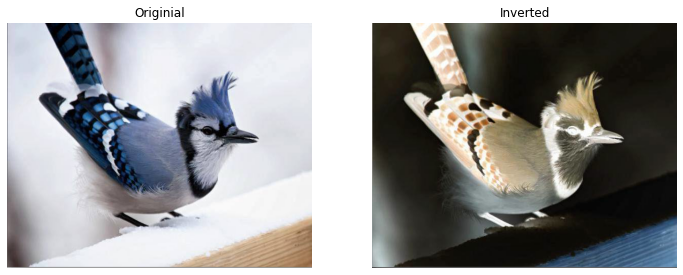

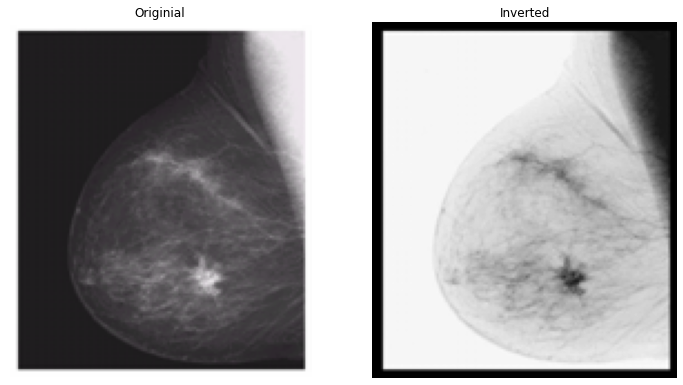

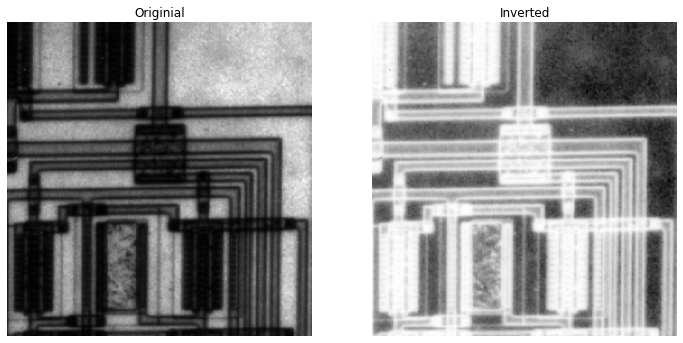

In [17]:
'''
1
Negative Transformation
'''

def Negative(img, L = -1,  greyscale = False):                                  #The len(img.shape)>2 is needed for .tif images.
    img = rgba2rgb(img) if len(img.shape) > 2 and img.shape[2] == 4 else img    #If it's RGBA convert to RGB
    img = rgb2gray(img) if greyscale and len(img.shape) > 2  else img           #If user wants a "grey-scale" negative transformation
    if L == -1: L = 255 if img.dtype == np.uint8 else 1.0                       #Depending on whether it was RBGA, RGB and what it is now.
    inv_img = np.zeros_like(img)

    if greyscale or len(img.shape) == 2:                        #should be self-explanatory from here
        inv_img = L - img
    else:
        for channel in range(inv_img.shape[2]):
            inv_img[...,channel] = L - img[...,channel]
        
    return inv_img

bird = io.imread('imgs/bird.jpg')
pic1 = io.imread('imgs/Picture1.png')
circuit = io.imread('imgs/circuit.tif')
show_images([bird, Negative(bird)], ["Originial", "Inverted"])
show_images([pic1, Negative(pic1, greyscale = True)], ["Originial", "Inverted"])
show_images([circuit, Negative(circuit, greyscale = True)], ["Originial", "Inverted"])

#The equation is: new_px = L - old_px where L is the no. of channels - 1

 

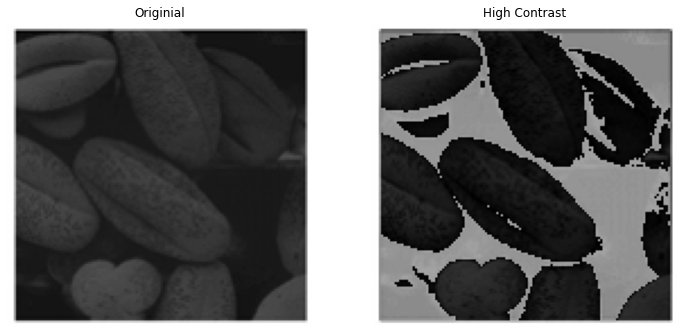

In [5]:
'''
2
Contrast Enhancement
'''

#def transformation(px):
#    return ((y1-y0)/(x1-x0)) * px + (y1 - ((y1-y0)/(x1-x0)) * x1) if x0 <= px <= x1 else px
#return np.array([[transformation(px) for px in row] for row in img])


def contrast_enhacement(img):   
   transformation  = lambda px : (1.5 * px + 50) if 0 <= px <= 100 else px  #for each pixel.
   return np.vectorize(transformation)(img)                                 # vectorize then call on the whole array. 
    
img = io.imread('imgs/Picture2.png')
img = rgb2gray(rgba2rgb(img)) if img.shape[2] == 4 else rgb2gray(img)      #to prevent a warning
#In the transformation we assumed the range being form 0 to 255 (not 0 to 1):
img = img_as_ubyte(img)                      

show_images([img, contrast_enhacement(img)], ["Originial", "High Contrast"])



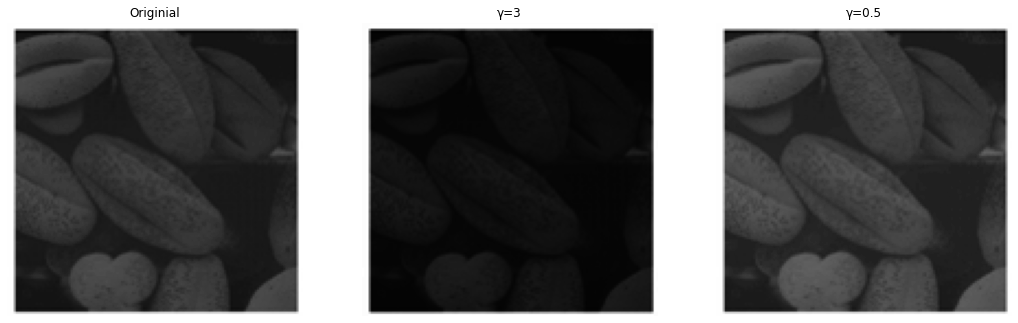

In [6]:
'''
3
Gamma Correction
'''

def gamma_correction(img, c, γ):   
   transformation  = lambda px, c, γ  : c * (px ** γ)     #for each pixel.
   return np.vectorize(transformation)(img, c, γ)         #vectorizing the function then call it on the whole array.

    
img = io.imread('imgs/Picture2.png')
img = rgb2gray(rgba2rgb(img)) if img.shape[2] == 4 else rgb2gray(img)   
show_images([img, gamma_correction(img, 1, 3), gamma_correction(img, 1, 0.5)], ["Originial", "γ=3", "γ=0.5"])


#Since 0 < px < 1
#The smaller γ is the more we map smaller pixel values to larger ones (0.1^0.1). (only very low pixels stay in darkness)
#If γ is beyond 1 then rather, px**γ is decreasing and only very bright pixel survive (others get pullsed to darkness)

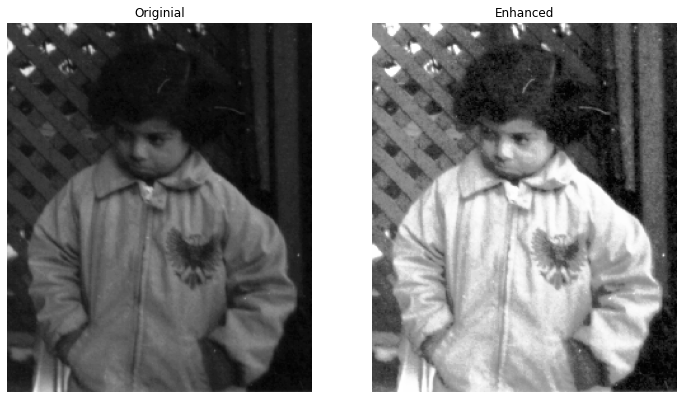

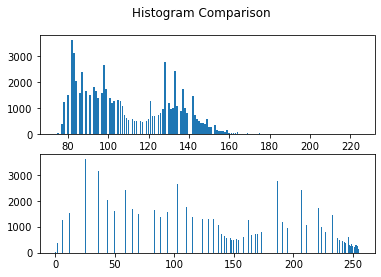

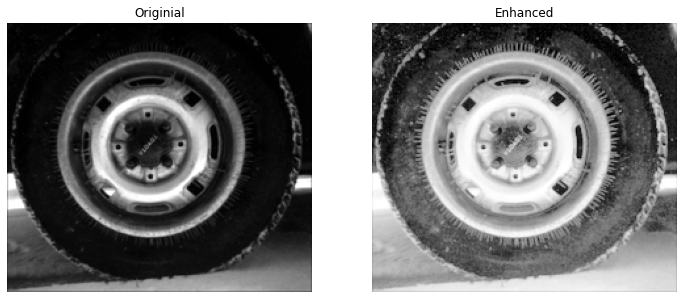

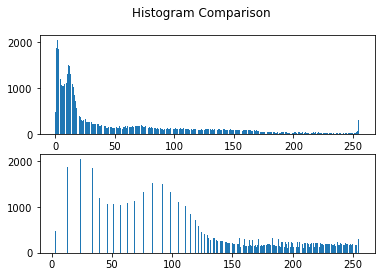

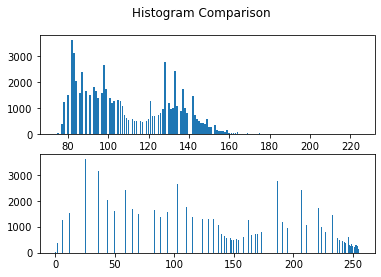

In [21]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
#return np.array([[transformation(px) for px in row] for row in img])   (in case we can't vectorize)


def hist_transform(img, G):
    #Making the historgram:
    H = np.zeros(G, dtype=np.uint)
    for px in img.flatten():    H[px] += 1      

    #Making the Cumulative Distribution Function of the Grey Levels (n_c/(nxm))
    n_c = np.zeros(G, dtype=np.uint)
    n_c[0] = H[0]
    for grey_level in range(1, G): n_c[grey_level] = n_c[grey_level-1] + H[grey_level]
    
    #Applying the transformation on the image:
    N, M = img.shape[0], img.shape[1]
    transformation  = lambda px : round((G - 1) * n_c[px]/(N * M)) 
    return np.vectorize(transformation)(img)    


pout = img_as_ubyte(io.imread('imgs/pout.tif'))
tire = img_as_ubyte(io.imread('imgs/tire.tif'))

pout1 = hist_transform(pout, 256)
tire1 = hist_transform(tire, 256)

show_images([pout, pout1], ["Originial", "Enhanced"])
showHist(histogram(pout), histogram(pout1) )
show_images([tire, tire1], ["Originial", "Enhanced"])
showHist(histogram(tire), histogram(tire1) )


def getImageWithHist(name,ext,nbins=256):
    pass    
